In [392]:
import pandas as pd
from pyvis.network import Network
import networkx as nx
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import math

In [393]:
current_dir = os.path.dirname(os.path.abspath(sys.argv[0]))

In [394]:
import json

with open('Retweet-JSON\#Bitcoin.json','r') as f:
    bitcoin = json.load(f)

with open('Retweet-JSON\#BoredApeYachtClub.json','r') as f:
    boredApeYachtClub = json.load(f)

with open('Retweet-JSON\#chatgpt.json','r') as f:
    chatGPT = json.load(f)

with open('Retweet-JSON\#energy.json','r') as f:
    energy = json.load(f)

with open('Retweet-JSON\#Eth.json','r') as f:
    eth = json.load(f)

with open('Retweet-JSON\#uranium.json','r') as f:
    uranium = json.load(f)

In [395]:
def tweetcount(hashtag):
    tweetcount = {}
    for tweeta in hashtag:
        if 'retweeted_status' in tweeta:
            screen_name = tweeta['retweeted_status']['user']['screen_name']
            tweet_text = tweeta['full_text']
            
            # Check if the screen name exists as a key and if the tweet is already in their list
            if screen_name in tweetcount:
                if tweet_text not in tweetcount[screen_name]:
                    tweetcount[screen_name].append(tweet_text)
            else:
                # Initialize with the first tweet's text if the key doesn't exist
                tweetcount[screen_name] = [tweet_text]
    return tweetcount

In [396]:
def retweetcount(hashtag):
    retweetcount = {}

    for tweets in hashtag:
        if 'retweeted_status' in tweets:
            screen_name = tweets['user']['screen_name']
            tweet_text = tweets['full_text']
            
            # Check if the screen name exists as a key and if the tweet is already in their list
            if screen_name in retweetcount:
                if tweet_text not in retweetcount[screen_name]:
                    retweetcount[screen_name].append(tweet_text)
            else:
                # Initialize with the first tweet's text if the key doesn't exist
                retweetcount[screen_name] = [tweet_text]
    return retweetcount

In [397]:
m=[len(a) for a in retweetcount(chatGPT)]

In [398]:
max(m)

15

In [399]:
def Networkplt(hashtag):

    G = nx.DiGraph()
    tc = tweetcount(hashtag)               # A dictionary with original tweeter's tweets
    rtc = retweetcount(hashtag)            # A dictionary with retweeter's tweets 
    for tweet in hashtag:
        retweeter_name = tweet['user']['screen_name']
        retweeter_follower_c = tweet['user']['followers_count']
        if 'retweeted_status' in tweet:
            original_tweeter_name = tweet['retweeted_status']['user']['screen_name']
            orignal_tweeter_follower_c = tweet['retweeted_status']['user']['followers_count']
            if G.has_edge(original_tweeter_name,retweeter_name):
                G.edges[original_tweeter_name,retweeter_name]['weight']+=1
    
            else:
                G.add_node(retweeter_name,weight = retweeter_follower_c, value =int(math.log(len(rtc[retweeter_name]))), color = 'Blue')
                G.add_node(original_tweeter_name, weight = orignal_tweeter_follower_c, value = int(math.log(len(tc[original_tweeter_name]))), color ='Red')
                G.add_edge(original_tweeter_name,retweeter_name, weight = 1)
        
    G.remove_edges_from(nx.selfloop_edges(G))
    #G = nx.k_core(G,2)
    nt = Network(directed=nx.is_directed(G), notebook=True,height='800px', width='100%')
    nt.from_nx(G)
    #nt.show_buttons(filter_=['physics'])
    nt.toggle_physics(False) # to avoid initial slow rendering
    # to activate forceAtlas2Based and interaction options
    nt.show_buttons(filter_=['physics', 'interaction'])
    return nt,G
    
    

In [400]:
nt, GPT = Networkplt(chatGPT)
#nt.show('GPT.html')

In [401]:
nt, BTC = Networkplt(bitcoin)
#nt.show('BTC.html')

In [402]:
nt, BRD = Networkplt(boredApeYachtClub)
#nt.show('boredApeYachtclub.html')

In [403]:
nt, ENG = Networkplt(energy)
#nt.show('energy.html')

In [404]:
nt, ETH = Networkplt(eth)
#nt.show('eth.html')

In [405]:
nt, URA = Networkplt(uranium)
#nt.show('uranium.html')

In [159]:
components = nx.weakly_connected_components(GPT)

In [160]:
a = [list(component) for component in components]

In [161]:
len(a)

457

In [182]:
#Calculate the Node statistics 
#Calculate Closeness, Degree, Betweeness centrality   df
#Calculate Assortivity
#Calculate the out-degree to No. of tweets for virality calculation    df
# Out degree to number of followers, high out degree with low followers mean virality of the tweet
#Identify high retweet users from many users.. High No of inbound   df
#density of the graph

#Talk about each network and their characteristics, from the earlier calculated table, show the top 10 of each category to make a point
#ChatGPT, BTC, Etherium, Uranium etc. 




In [183]:
# Draw K-core=2 networks for all 

In [184]:
# Plot the CCDF of all networks togeather
#talk about the differences in terms of in-degree / out-degree distribution 

In [406]:
def NodeStats (G, Gjson):
    in_degree = pd.DataFrame.from_dict(dict(G.in_degree()),orient ='index',columns=['in_degree']).sort_index()
    out_degree = pd.DataFrame.from_dict(dict(G.out_degree()), orient = 'index', columns = ['out_degree']).sort_index()
    degree = pd.DataFrame.from_dict(dict(G.degree()), orient = 'index', columns = ['degree']).sort_index()
    closeness = pd.DataFrame.from_dict(dict(nx.closeness_centrality(G,wf_improved=True)), orient = 'index', columns = ['closeness']).sort_index()
    betweeness = pd.DataFrame.from_dict(dict(nx.betweenness_centrality(G, normalized=True)), orient = 'index', columns = ['betweeness']).sort_index()
    #assortitivity = pd.DataFrame.from_dict(dict(nx.attribute_assortativity_coefficient(G)), orient = 'index', columns = ['betweeness']).sort_index()
    #nfollowers = pd.DataFrame.from_dict(dict(GPT.nodes)}), orient = 'index', columns = ['betweeness'])
    ntweets = pd.DataFrame.from_dict({node: len(att) for node,att in dict(tweetcount(Gjson)).items()},orient='index', columns = ['ntweets']).sort_index()
    nretweets = pd.DataFrame.from_dict({node: len(att) for node,att in dict(retweetcount(Gjson)).items()},orient='index', columns = ['nretweets']).sort_index()
    nfollowers = pd.DataFrame.from_dict({node: att['weight'] for node,att in G.nodes(data=True)},orient='index', columns = ['nfollowers']).sort_index()
    NodeStats = pd.concat([in_degree,out_degree,degree,closeness,betweeness,ntweets,nretweets,nfollowers],axis=1)
    NodeStats['virality'] = NodeStats['out_degree']/NodeStats['nfollowers']
    NodeStats = NodeStats.sort_values(by='out_degree',ascending=False)
    return NodeStats

In [407]:
BTC_Stat = NodeStats(BTC,bitcoin)
GPT_Stat = NodeStats(GPT,chatGPT)
BRD_Stat = NodeStats(BRD,boredApeYachtClub)
ENG_Stat = NodeStats(ENG,energy)
ETH_Stat = NodeStats(ETH,eth)
URA_Stat = NodeStats(URA,uranium)

In [353]:
NodeStats.loc[NodeStats['out_degree']>50].nlargest(20,'virality', keep='all')

AttributeError: 'function' object has no attribute 'loc'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


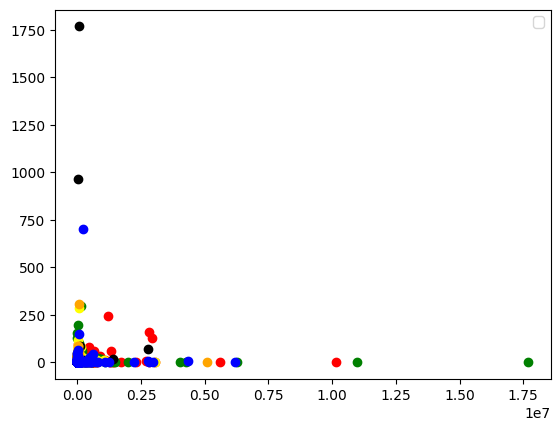

In [409]:
plt.scatter(BTC_Stat['nfollowers'],BTC_Stat['out_degree'],c='red')
plt.scatter(GPT_Stat['nfollowers'],GPT_Stat['out_degree'],c='green')
plt.scatter(ETH_Stat['nfollowers'],ETH_Stat['out_degree'],c='yellow')
plt.scatter(BRD_Stat['nfollowers'],BRD_Stat['out_degree'],c='black')
plt.scatter(URA_Stat['nfollowers'],URA_Stat['out_degree'],c='orange')
plt.scatter(ENG_Stat['nfollowers'],ENG_Stat['out_degree'],c='blue')
plt.legend()

In [371]:
int_nodes = BTC_Stat.index.intersection(GPT_Stat.index)

In [388]:
abc = nx.weakly_connected_components(GPT)

In [389]:
relevant_components = [component for component in abc if any(node in component for node in int_nodes)]

In [391]:
int_nodes

Index(['VinodJason', 'GenxAnalytics', 'RunnymedeCap', 'Cryptogains9',
       'JaniseMonroy', 'maximustechmxz', 'Satoshi_Talks', 'PrimaryDomain',
       'block_delta', 'StarfighterGen', 'esatoshiclub', 'NFT_World_News',
       'sonu_monika', 'bjeaglefeather', 'technicitymag', 'shehriyar_x2',
       'charlotedaviis', '_CocoBot', 'Verdoux11', 'toudajew', 'uCloudifyAI',
       'ahtuzhlobko', 'kush420pi', 'padagalpavan', 'kamsylove46',
       'rahul05ranjan', 'kriptokafein', 'nebukenazzer3', 'saadameer310',
       'domainhelpline', 'domainapebot', 'sayy_hassan', 'eStream_Studios',
       'jahanerooni', 'inspiredmoneyfm', 'DibalaHo', 'HarryBee_Yhu',
       'Amandam41927499', 'AlexaBlockchain', 'BubbleJunction', 'Sahil_BB7',
       'TECHW1G', 'MOHAMMA28217447', 'Metilda_loisel'],
      dtype='object')

In [410]:
GPT_Stat

,in_degree,out_degree,degree,closeness,betweeness,ntweets,nretweets,nfollowers,virality
Ishansharma7390,0,294,294,0.000000,0.0,1.0,NaN,136398,0.002155
Whistle020,0,197,197,0.000000,0.0,2.0,NaN,10023,0.019655
johnvianny,0,155,155,0.000000,0.0,1.0,NaN,1357,0.114223
bepaitoken,0,126,126,0.000000,0.0,1.0,NaN,3877,0.032499
DataChaz,0,103,103,0.000000,0.0,13.0,1.0,62327,0.001653
...,...,...,...,...,...,...,...,...,...
Praveen06136792,1,0,1,0.000326,0.0,NaN,1.0,18,0.000000
Praveen43673603,1,0,1,0.000326,0.0,NaN,1.0,472,0.000000
President_Law_,1,0,1,0.000326,0.0,NaN,1.0,2090,0.000000
PrimaRudolph1,1,0,1,0.000326,0.0,NaN,1.0,0,NaN


In [417]:
def dataVs(hashtag):
    date = [tweet['created_at'] for tweet in hashtag]
    # Convert string to datetime objects
    datetime_o = [datetime.strptime(date_s, '%a %b %d %H:%M:%S %z %Y') for date_s in daten]
    print(max(datetime_o)-min(datetime_oe))
    len(hashtag)


In [429]:
daten = list(set(date))

In [430]:
type(daten)

list

In [436]:
max(daten)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [445]:
# Convert string to datetime objects
datetime_objects = [datetime.strptime(date_str, '%a %b %d %H:%M:%S %z %Y') for date_str in daten]

# Example: Sorting the datetime objects
sorted_datetime_objects = sorted(datetime_objects)

In [453]:
adf = max(datetime_objects)-min(datetime_objects)

In [451]:
max(datetime_objects)

datetime.datetime(2023, 2, 7, 20, 42, 13, tzinfo=datetime.timezone.utc)

In [452]:
min(datetime_objects)

datetime.datetime(2023, 2, 6, 3, 13, 45, tzinfo=datetime.timezone.utc)

In [455]:
type(adf)

datetime.timedelta

In [456]:
len(datetime_objects)

4139

In [461]:
adf / int(len(5

datetime.timedelta(seconds=29861, microseconds=600000)

In [460]:
adf

datetime.timedelta(days=1, seconds=62908)

In [463]:
adf / len(chatGPT)

datetime.timedelta(seconds=29, microseconds=861600)